In [81]:
import os
import sys
import glob
import re
import pprint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [82]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
sys.path.append('../../statmechlib')
from statmechlib.read_write import read_poscar, read_xdatcar, read_outcar, read_vasp

In [113]:
target_raw = '../../../mxene/ti3cn_alf3'
datasets = ['O-termi-ti3cn-data/data-1', 'O-termi-ti3cn-data/data-2', 'F-termi-ti3cn-data/data-1', 'F-termi-ti3cn-data/data-3']

In [114]:
trajdirs = [target_raw + '/' + dataset for dataset in datasets]

In [115]:
#os.listdir(trajdirs[0])
print(trajdirs[0])

../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-1


In [168]:
trajectories = []
for traj_name in trajdirs:
    trajectories.append(read_vasp(traj_name))

Reading ../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-1/OUTCAR-TI3CNO2-ALF3-RUN1.txt
Reading ../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-1/POSCAR-TI3CNO2-ALF3.vasp
Reading ../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-2/OUTCAR-TI3CNO2-ALF3-RUN2.txt
Reading ../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-2/POSCAR-TI3CNO2-ALF3.vasp
Reading ../../../mxene/ti3cn_alf3/F-termi-ti3cn-data/data-1/OUTCAR-TI3CNF2-ALF3-RUN1
Reading ../../../mxene/ti3cn_alf3/F-termi-ti3cn-data/data-1/POSCAR-TI3CNF2-ALF3.vasp
Reading ../../../mxene/ti3cn_alf3/F-termi-ti3cn-data/data-3/OUTCAR-TI3CNF2-ALF3-RUN3
Reading ../../../mxene/ti3cn_alf3/F-termi-ti3cn-data/data-3/POSCAR-TI3CNF2-ALF3.vasp


In [169]:
for i in range(len(trajectories)):
    print(trajectories[i]['atom_type'], trajectories[i]['atom_num'])

['C', 'N', 'Ti', 'O', 'Al', 'F'] [32, 32, 96, 64, 4, 12]
['C', 'N', 'Ti', 'O', 'Al', 'F'] [32, 32, 96, 64, 4, 12]
['C', 'N', 'Ti', 'F', 'Al'] [32, 32, 96, 76, 4]
['C', 'N', 'Ti', 'F', 'Al'] [32, 32, 96, 76, 4]


0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 619
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 426
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 432
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


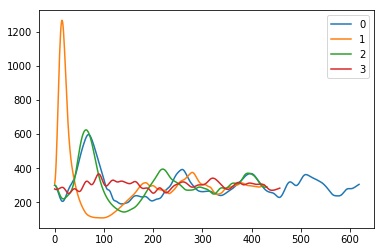

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 619
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 426
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 432
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


<function matplotlib.pyplot.legend(*args, **kwargs)>

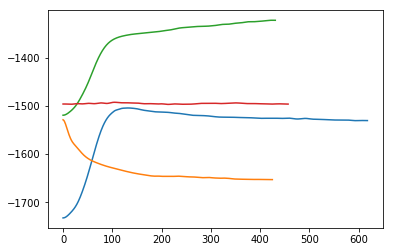

In [170]:
for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_type'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=i)

plt.legend()
plt.show()

for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_type'], trj['atom_num'])), len(trj['energy']))
    plt.plot(trj['energy'], label=i)
plt.legend

In [171]:
# Process trajectories - cut out the equilibration periods
min_conf = [100, 150, 100, 0] # starting indices

In [172]:
# cycle over trajectories and eliminate equilibration configurations in all
for i, trj in enumerate(trajectories):
    for key in trj:
        print('Start:', i, key, len(trj[key]), end=' ')
        if 'atom' in key:
            continue
        if type(trj[key]) == list:
            trj[key][:] = trj[key][min_conf[i]:]
            
        print('End:', i, key, len(trj[key]))

Start: 0 box 619End: 0 box 519
Start: 0 xyz 619End: 0 xyz 519
Start: 0 energy 619End: 0 energy 519
Start: 0 forces 619End: 0 forces 519
Start: 0 temp 619End: 0 temp 519
Start: 0 free_energy 619End: 0 free_energy 519
Start: 0 total_energy 619End: 0 total_energy 519
Start: 0 atom_num 6Start: 0 box0 3End: 0 box0 3
Start: 0 xyz0 240End: 0 xyz0 240
Start: 0 atom_type 6Start: 1 box 426End: 1 box 276
Start: 1 xyz 426End: 1 xyz 276
Start: 1 energy 426End: 1 energy 276
Start: 1 forces 426End: 1 forces 276
Start: 1 temp 426End: 1 temp 276
Start: 1 free_energy 426End: 1 free_energy 276
Start: 1 total_energy 426End: 1 total_energy 276
Start: 1 atom_num 6Start: 1 box0 3End: 1 box0 3
Start: 1 xyz0 240End: 1 xyz0 240
Start: 1 atom_type 6Start: 2 box 432End: 2 box 332
Start: 2 xyz 432End: 2 xyz 332
Start: 2 energy 432End: 2 energy 332
Start: 2 forces 432End: 2 forces 332
Start: 2 temp 432End: 2 temp 332
Start: 2 free_energy 432End: 2 free_energy 332
Start: 2 total_energy 432End: 2 total_energy 332
Sta

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 519
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 276
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 332
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


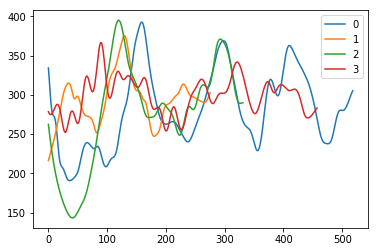

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 519
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 276
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 332
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


<function matplotlib.pyplot.legend(*args, **kwargs)>

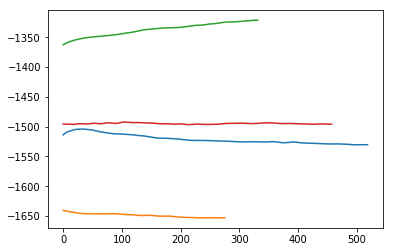

In [173]:
for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_type'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=i)

plt.legend()
plt.show()

for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_type'], trj['atom_num'])), len(trj['energy']))
    plt.plot(trj['energy'], label=i)
plt.legend